In [8]:
#Q8
from scipy.spatial.distance import cosine, jaccard

# Binary vectors for each observation
o1 = [0, 1, 0, 1]
o2 = [0, 1, 0, 1]
# o3 = [0, 0, 1, 0, 0, 1, 0, 1]
# o4 = [0, 1, 0, 0, 0, 1, 0, 1]
# o1 to o4 taken as per problem, see what you problem asks for

# Compute SMC
def smc(a, b):
    return sum(1 for x, y in zip(a, b) if x == y) / len(a)

# Compute Cosine Similarity
def cos_sim(a, b):
    return 1 - cosine(a, b)

# Compute Jaccard Index
def jaccard_index(a, b):
    return 1 - jaccard(a, b)

# Calculate similarities
smc_o1_o2 = smc(o1, o2)
# cos_o1_o2 = cos_sim(o1, o2)
# smc_o3_o4 = smc(o3, o4)
# j_o2_o4 = jaccard_index(o2, o4)

print(f"SMC(o2, o4): {smc_o1_o2:.3f}")
# print(f"Cos(o1, o2): {cos_o1_o2:.3f}")
# print(f"SMC(o3, o4): {smc_o3_o4:.3f}")
# print(f"J(o2, o4): {j_o2_o4:.3f}")


SMC(o2, o4): 1.000


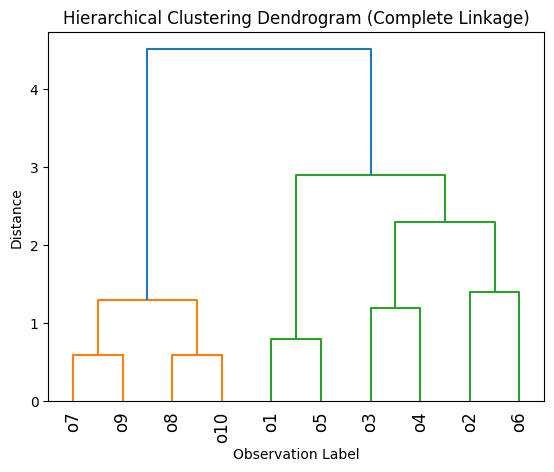

In [13]:
import numpy as np
from scipy.cluster.hierarchy import complete, dendrogram, average
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform

# Define the distance matrix
distance_matrix = np.array([
    [0.0, 2.6, 2.8, 2.1, 0.8, 1.7, 3.9, 3.8, 4.1, 4.2],
    [2.6, 0.0, 1.8, 2.3, 2.7, 1.4, 1.9, 1.7, 2.0, 2.2],
    [2.8, 1.8, 0.0, 1.2, 2.9, 2.1, 2.2, 1.6, 2.3, 2.0],
    [2.1, 2.3, 1.2, 0.0, 2.4, 1.8, 2.6, 2.5, 3.0, 2.9],
    [0.8, 2.7, 2.9, 2.4, 0.0, 2.0, 4.2, 4.0, 4.4, 4.5],
    [1.7, 1.4, 2.1, 1.8, 2.0, 0.0, 2.4, 2.6, 2.7, 3.0],
    [3.9, 1.9, 2.2, 2.6, 4.2, 2.4, 0.0, 1.2, 0.6, 1.3],
    [3.8, 1.7, 1.6, 2.5, 4.0, 2.6, 1.2, 0.0, 1.0, 0.6],
    [4.1, 2.0, 2.3, 3.0, 4.4, 2.7, 0.6, 1.0, 0.0, 0.9],
    [4.2, 2.2, 2.0, 2.9, 4.5, 3.0, 1.3, 0.6, 0.9, 0.0]
])


# Condense the distance matrix to the format required by the complete (Maximum) linkage function
condensed_dist_matrix = squareform(distance_matrix, checks=True)

# Perform complete linkage hierarchical clustering
linked = complete(condensed_dist_matrix)

# Plot the dendrogram
dendrogram(linked,
           labels=['o1', 'o2', 'o3', 'o4', 'o5', 'o6', 'o7', 'o8', 'o9', 'o10'],
           leaf_rotation=90,
           )
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.xlabel('Observation Label')
plt.ylabel('Distance')
plt.show()


In [14]:
import numpy as np

# True class labels and predicted outputs
y_true = np.array([2, 2, 1, 2, 1, 1])
y_pred = np.array([2, 2, 2, 1, 2, 2])

# Initial weights (equal for each observation)
N = len(y_true)
initial_weights = np.full(N, 1/N)

# Calculate error rate
misclassified = y_true != y_pred
error_rate = np.sum(initial_weights[misclassified])

# Calculate classifier performance
alpha = 0.5 * np.log((1 - error_rate) / error_rate)

# Update weights
updated_weights = initial_weights.copy()
updated_weights[misclassified] *= np.exp(alpha)
updated_weights[~misclassified] *= np.exp(-alpha)

# Normalize the updated weights
normalized_weights = updated_weights / np.sum(updated_weights)
normalized_weights


array([0.25 , 0.25 , 0.125, 0.125, 0.125, 0.125])

In [17]:
import numpy as np

# Distance matrix for the 10 observations
distances = np.array([
    [0.0, 2.6, 2.8, 2.1, 0.8, 1.7, 3.9, 3.8, 4.1, 4.2],
    [2.6, 0.0, 1.8, 2.3, 2.7, 1.4, 1.9, 1.7, 2.0, 2.2],
    [2.8, 1.8, 0.0, 1.2, 2.9, 2.1, 2.2, 1.6, 2.3, 2.0],
    [2.1, 2.3, 1.2, 0.0, 2.4, 1.8, 2.6, 2.5, 3.0, 2.9],
    [0.8, 2.7, 2.9, 2.4, 0.0, 2.0, 4.2, 4.0, 4.4, 4.5],
    [1.7, 1.4, 2.1, 1.8, 2.0, 0.0, 2.4, 2.6, 2.7, 3.0],
    [3.9, 1.9, 2.2, 2.6, 4.2, 2.4, 0.0, 1.2, 0.6, 1.3],
    [3.8, 1.7, 1.6, 2.5, 4.0, 2.6, 1.2, 0.0, 1.0, 0.6],
    [4.1, 2.0, 2.3, 3.0, 4.4, 2.7, 0.6, 1.0, 0.0, 0.9],
    [4.2, 2.2, 2.0, 2.9, 4.5, 3.0, 1.3, 0.6, 0.9, 0.0]
])


# Class labels for the observations
# Assuming C1 = poor rating, C2 = average rating, C3 = high rating
class_labels = np.array(['C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C2'])

# Leave-One-Out Cross Validation for KNN
k = 3
errors = 0

# Iterate over each observation
for i in range(len(distances)):
    # Create a mask to exclude the current observation
    mask = np.ones(len(distances), dtype=bool)
    mask[i] = False

    # Get the distances and labels for the remaining observations
    distances_without_i = distances[i, mask]
    labels_without_i = class_labels[mask]

    # Find the indices of the k-nearest neighbors (excluding the current observation)
    neighbor_indices = np.argsort(distances_without_i)[:k]
    
    # Get the classes of the k-nearest neighbors
    neighbor_classes = labels_without_i[neighbor_indices]
    
    # Determine the most common class among the neighbors
    unique, counts = np.unique(neighbor_classes, return_counts=True)
    neighbor_class_counts = dict(zip(unique, counts))
    
    # Tie-breaking rule: choose the class of the closest neighbor among the tied classes
    if len(unique[counts == counts.max()]) > 1:  # There's a tie
        # Sort neighbors by distance and take the class of the closest one
        sorted_neighbors_by_distance = labels_without_i[np.argsort(distances_without_i)]
        for label in sorted_neighbors_by_distance:
            if label in unique[counts == counts.max()]:
                predicted_class = label
                break
    else:
        # No tie, take the most common class
        predicted_class = unique[counts.argmax()]
    
    # Increment the error count if the prediction is wrong
    if predicted_class != class_labels[i]:
        errors += 1

# Calculate the error rate
error_rate = errors / len(distances)

error_rate


0.0

In [18]:
import numpy as np

# Given S matrix from Singular Value Decomposition
S = np.array([
    [3.7, 0, 0, 0],
    [0, 3.04, 0, 0],
    [0, 0, 0.56, 0],
    [0, 0, 0, 0.48],
])

# Calculate total variance and cumulative variance explained
total_variance = np.sum(S**2)
variance_explained = np.cumsum(S.diagonal()**2) / total_variance

# Print statements to decide which option is correct
print("Variance explained by the first principal component:", variance_explained[0])
print("Variance explained by the first two principal components:", variance_explained[1])
print("Variance explained by the first three principal components:", variance_explained[2])
print("Variance explained by the first four principal components:", variance_explained[3])
print("Variance explained by the last four principal components:", 1 - variance_explained[0])

Variance explained by the first principal component: 0.5831586839101025
Variance explained by the first two principal components: 0.9768270033566768
Variance explained by the first three principal components: 0.990185554362828
Variance explained by the first four principal components: 1.0000000000000002
Variance explained by the last four principal components: 0.4168413160898975


In [20]:
import numpy as np

# The point to classify
b = np.array([1, -0.0, -1.0])  # Including the bias term as the first element

# Weights given in the options
weights_options = {
    'A': (np.array([-0.31, -0.06, 0.07])),
    'B': (np.array([0.72, 3.13, -0.25])),
    # 'C': (np.array([-0.9, -4.39, -0.0])),
    # 'D': (np.array([-1.22, -9.88, -0.01]))
}

# For each option, calculate the logits and predict the class
predictions = {}
for option, (w1) in weights_options.items():
    y1 = np.dot(b, w1)
    y2 = np.dot(b, w2)
    y3 = 0  # Since the weights for class 3 are not provided, we assume a weight vector of zeros.
    # The predicted class is the one with the maximum logit
    predicted_class = np.argmax([y1, y2, y3]) + 1  # Adding 1 to match class numbering starting at 1
    predictions[option] = predicted_class

predictions


{'A': 3, 'B': 1}

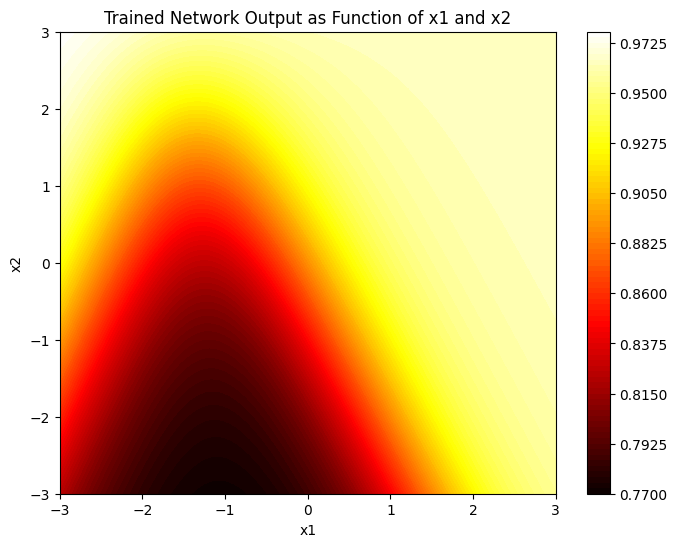

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define the logistic (sigmoid) function
def sigmoid(z):
    return ((np.exp(z) - np.exp(-z))/(np.exp(z)+ np.exp(-z)))

# Define the linear activation function
def linear(a):
     return a

# Given weights for the neural network
w1_1 = np.array([2.2, 0.7, -0.3])
w1_2 = np.array([-0.2, 0.8, 0.4])
w2_0 = 2.2
w2 = np.array([-0.7, 0.5])  # Corrected to a single array

# Function to compute the output of the ANN based on the weights and inputs
def neural_network_output(x1, x2):
    # Input layer to hidden layer
    z1 = sigmoid(w1_1[0] + w1_1[1]*x1 + w1_1[2]*x2)
    z2 = sigmoid(w1_2[0] + w1_2[1]*x1 + w1_2[2]*x2)
    
    # Hidden layer to output layer
    z3 = w2_0 + (w2[0] * z1) + (w2[1] * z2)  # Corrected to use the single array
    output = sigmoid(z3)
    return output

# Generate a grid of x1 and x2 values
x1_values = np.linspace(-3, 3, 100)
x2_values = np.linspace(-3, 3, 100)
x1_grid, x2_grid = np.meshgrid(x1_values, x2_values)

# Compute the network output for each combination of x1 and x2
output_grid = np.zeros_like(x1_grid)
for i in range(x1_grid.shape[0]):
    for j in range(x1_grid.shape[1]):
        output_grid[i, j] = neural_network_output(x1_grid[i, j], x2_grid[i, j])

# Plot the output grid as a heatmap
plt.figure(figsize=(8, 6))
plt.contourf(x1_grid, x2_grid, output_grid, levels=100, cmap='hot')
plt.colorbar()
plt.title('Trained Network Output as Function of x1 and x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


In [24]:
from scipy.stats import norm

# Given parameters
mu1 = [0.77, -0.41]  # Means of the Gaussians
sigma1 = [0.29, 0.12], [-0.12, 0.55]  # Standard deviations of the Gaussians
densities1 = [norm.pdf(mu1[k], sigma1[k]) for k in range(2)]

mu2 = [-0.91, 0.5]  # Means of the Gaussians
sigma2 = [0.32, -0.11], [-0.11, 1.12]  # Standard deviations of the Gaussians
densities2 = [norm.pdf(mu2[k], sigma2[k]) for k in range(2)]
densities1, densities2

([array([0.35553253, 0.32297236]), array([0.38251457, 0.25164434])],
 [array([0.18723542, 0.28969155]), array([0.33121468, 0.32918396])])